In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from keras.models import model_from_json
import numpy as np
import os

import matplotlib.pyplot as plt
import matplotlib.patches as patches

#from tensorflow.keras.utils import np_utils # To transform labels in categorical
#import tensorflow.keras.np_utils
from keras.utils import to_categorical
from tensorflow.keras.datasets import mnist # To load the dataset
from tensorflow.keras import backend as K
import tensorflow.keras as keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten,Activation,AveragePooling2D, Normalization
#from tensorflow.keras.layers.normalization import batch_normalization as BatchNormalization

In [35]:
import tensorflow as tf

In [36]:
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [38]:
trainY = to_categorical(trainY,10)
testY = to_categorical(testY,10)

In [39]:
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

## CNN

In [40]:
model = Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(train_norm, trainY, epochs=5, batch_size=32, validation_data=(test_norm, testY), verbose=1)

Epoch 1/5


2023-02-02 17:29:16.355632: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-02 17:29:16.545740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.1520 - accuracy: 0.9539

2023-02-02 17:29:34.750003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 20s 10ms/step - loss: 0.1520 - accuracy: 0.9539 - val_loss: 0.0676 - val_accuracy: 0.9774
Epoch 2/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.0517 - val_accuracy: 0.9825
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0299 - accuracy: 0.9907 - val_loss: 0.0430 - val_accuracy: 0.9843
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0198 - accuracy: 0.9932 - val_loss: 0.0371 - val_accuracy: 0.9881
Epoch 5/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0132 - accuracy: 0.9956 - val_loss: 0.0540 - val_accuracy: 0.9826


In [7]:
model.save('cnn_model.h5')

# FFNN

In [8]:
model = Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.Dense(10, activation='softmax'))
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(train_norm, trainY, epochs=5, batch_size=32, validation_data=(test_norm, testY), verbose=1)

Epoch 1/5
   7/1875 [..............................] - ETA: 15s - loss: 2.1288 - accuracy: 0.2723 

2023-02-02 17:30:49.713546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1868/1875 [============================>.] - ETA: 0s - loss: 0.2705 - accuracy: 0.9214

2023-02-02 17:31:03.293576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 16s 8ms/step - loss: 0.2701 - accuracy: 0.9215 - val_loss: 0.1458 - val_accuracy: 0.9566
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1194 - accuracy: 0.9652 - val_loss: 0.1008 - val_accuracy: 0.9697
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0849 - accuracy: 0.9745 - val_loss: 0.0893 - val_accuracy: 0.9721
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0649 - accuracy: 0.9808 - val_loss: 0.0892 - val_accuracy: 0.9730
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0515 - accuracy: 0.9844 - val_loss: 0.0790 - val_accuracy: 0.9744


In [10]:
model.save('ffnn_model.h5')

## Model with data augmentation

In [11]:
model = Sequential()

model.add(Conv2D(32,(3,3), input_shape=(28,28,1), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(32,(3,3), input_shape=(28,28,1), padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3), padding='same'))
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(2)))

model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(128,(3,3), padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3), padding='same'))
model.add(Activation('relu'))

model.add(Conv2D(256,(3,3), padding='same'))
model.add(Activation('relu'))

model.add(AveragePooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                      

In [41]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.4,
    height_shift_range=0.4,
    validation_split=0.2)

In [42]:
datagen.fit(train_norm)

train_generator = datagen.flow(train_norm, trainY, batch_size=64, shuffle=True, 
                               seed=2, save_to_dir=None, subset='training')

validation_generator = datagen.flow(train_norm, trainY, batch_size=64, shuffle=True, 
                               seed=2, save_to_dir=None, subset='validation')

This training may take longer than the others. You will need roughly 5-10 epochs to get a good enough result.

In [44]:
epochs = 5
model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(train_generator, steps_per_epoch = 600, epochs=epochs,
          validation_data = validation_generator,
          validation_steps = 150)

Epoch 1/5
  1/600 [..............................] - ETA: 2:56 - loss: 0.5234 - accuracy: 0.8438

2023-02-02 17:47:39.852044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


598/600 [============================>.] - ETA: 0s - loss: 0.5523 - accuracy: 0.8259

2023-02-02 17:47:46.863922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 8s 13ms/step - loss: 0.5521 - accuracy: 0.8260 - val_loss: 0.4805 - val_accuracy: 0.8460
Epoch 2/5
600/600 [==============================] - 8s 13ms/step - loss: 0.4632 - accuracy: 0.8536 - val_loss: 0.4238 - val_accuracy: 0.8673
Epoch 3/5
600/600 [==============================] - 8s 13ms/step - loss: 0.4117 - accuracy: 0.8707 - val_loss: 0.3922 - val_accuracy: 0.8739
Epoch 4/5
600/600 [==============================] - 8s 13ms/step - loss: 0.3788 - accuracy: 0.8814 - val_loss: 0.3634 - val_accuracy: 0.8864
Epoch 5/5
600/600 [==============================] - 8s 13ms/step - loss: 0.3507 - accuracy: 0.8909 - val_loss: 0.3538 - val_accuracy: 0.8905


In [ ]:
model.save('cnn_augm_model.h5')

Text(0, 0.5, 'Loss')

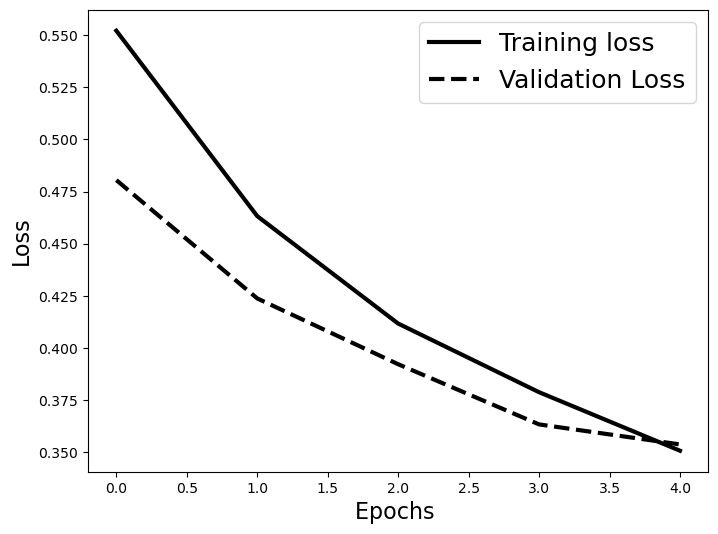

In [45]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'black',linewidth=3.0)
plt.plot(history.history['val_loss'],'black',ls = '--', linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
#plt.title('Loss Curves',fontsize=16)


Text(0, 0.5, 'Accuracy')

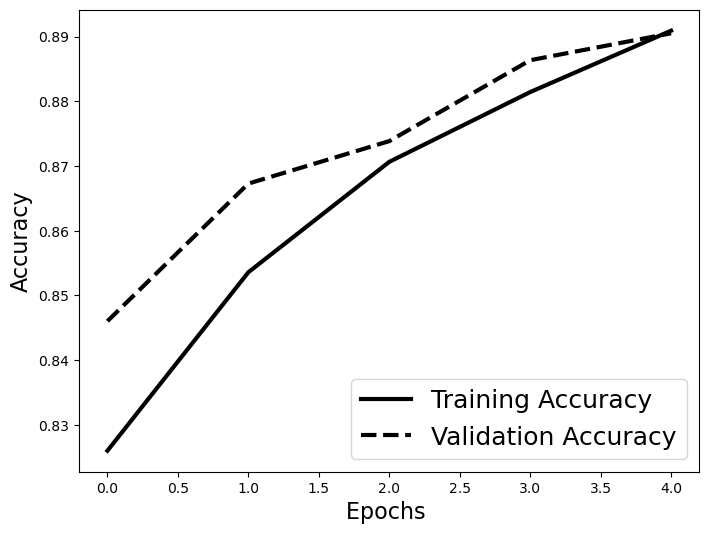

In [46]:
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'black',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'black',ls = '--',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18, 
           loc = 'lower right')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.title('Accuracy Curves',fontsize=16)
